<h1><b>Predictive Analysis of Maternal Depression</b></h1>

A considerable proportion of women across the world are affected with Maternal or Perinatal Depression, commonly referred to as Prenatal or Postnatal Depression. Early identification, intervention, and treatment are important for improving the mother’s mental health and the overall growth and development of the baby. <br>
This study analyses the information using statistical methods and machine learning algorithms like Ridge Regression, Random Forest Regression, and Support Vector Regression to find patterns, correlations, and risk factors related to Perinatal Depression. <br><br>
The objectives of this study are: <br>
1. Identifying the factors that can lead to depression in pregnant and new moms. <br>
2. Predicting depression in different stages of motherhood based on the past data. <br>
3. Analysing whether depression in mothers can affect a child’s behavioural aspects.

In [ ]:
#I Used Google Colab to run the project
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


**Installing pyreadstat** <br>
pyreadstat is a python package that can be used for reading SPSS, Stata files into pandas dataframe

In [ ]:
pip install pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 17.0 MB/s eta 0:00:00


**Installing tabulate** <br>
tabulate is a python library that can be used for printing tables in a defined format.

In [ ]:
pip install tabulate

In [ ]:
#importing all the required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
import scipy
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import statsmodels.api as sm
from matplotlib import pyplot
from statsmodels.stats.weightstats import ztest
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from tabulate import tabulate
from sklearn.model_selection import KFold
from scipy.stats import kruskal

In [ ]:
#loading the dataset from google colab
#read_spss() is a method that is used for loading a SPSS file.
mainFile=pd.read_spss("/content/drive/MyDrive/Dissertation/MentalHealthData.sav")
mainFile

,ID,Country,T1_Part,T2_RET,T3_RET,T4_RET,M_ETH,M_EDU,M_EMP,MAGEB,...,T2MCTS,T3MCTS,T4MCTS,T1MPSEF,T2MPSEF,T2DOR,T3BITSEA_T,T4SDQ_I,T4SDQ_E,Missing
0,1005.0,UK,Participated,Participated,Participated,Participated,White,Masters,Full Time,31.10,...,28.0,25.00000,28.000000,5.1875,4.0000,3.83,10.500000,3.000000,7.500000,0.0
1,1006.0,UK,Participated,Participated,Participated,Participated,White,Masters,Full Time,36.91,...,28.0,30.00000,30.000000,4.8125,5.7500,4.75,12.500000,3.500000,5.000000,0.0
2,1012.0,UK,Participated,Participated,Participated,Participated,White,Masters,Full Time,33.23,...,33.0,31.00000,29.000000,5.4375,6.0000,4.75,16.000000,6.000000,7.500000,0.0
3,1014.0,UK,Participated,Participated,Participated,Participated,White,Bachelors,Part Time,31.30,...,27.0,32.00000,31.000000,4.7500,3.6875,4.00,15.000000,1.000000,6.500000,0.0
4,1020.0,UK,Participated,Participated,Participated,Participated,White,Masters,Part Time,34.44,...,27.0,30.00000,32.000000,5.0625,4.8750,4.08,13.500000,2.000000,8.500000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,3236.0,USA,Participated,Participated,Participated,Participated,White,Doctoral,Full Time,35.57,...,32.0,32.00000,31.000000,6.5000,6.5000,4.50,4.810162,3.000000,1.000000,0.0
367,3239.0,USA,Participated,Participated,Participated,Participated,Asian,Bachelors,Part Time,27.26,...,25.0,26.87209,29.000000,4.8750,5.1875,4.17,8.511028,5.000000,7.000000,0.0
368,3241.0,USA,Participated,Participated,Participated,Participated,Asian,Masters,Full Time,32.26,...,29.0,29.00000,29.000000,4.1875,5.6875,5.00,7.500000,3.000000,6.000000,0.0
369,3242.0,USA,Participated,Participated,Participated,Participated,NaN,Masters,Student,33.48,...,30.0,30.00000,28.000000,6.6250,6.0625,5.67,8.000000,1.000000,4.000000,1.0


In [ ]:
#Dropping unnecessary columns
#T1_Part, T2_RET, T3_RET, T4_RET represents whether the mother has participated in all the four questionnaire sessions.
#T1 represents the interview was conducted during the last month of the pregnancy
#T2 represents 4-months follow-up questionnaire
#T3 represents 14-months follow-up questionnaire
#T4 represents 24-months follow-up questionnaire
#Missing represents the number of missing values in each column
mainFile=mainFile.drop(['T1_Part','T2_RET','T3_RET','T4_RET','Missing'],axis=1)

#Finding the number of null values in each column
mainFile.isnull().sum()

ID             0
Country        0
M_ETH         13
M_EDU          5
M_EMP          1
MAGEB          0
MumLAD         0
CGEN           0
MHXD           0
T1MCESD        0
T2MCESD        0
T3MCESD        0
T4MCESD        0
T1MFAM         0
T1MFRI         0
T1MSPE         0
T2MFAM         0
T2MFRI         0
T2MSPE         0
T3MFAM         0
T3MFRI         0
T3MSPE         0
T4MFAM         0
T4MFRI         0
T4MSPE         0
T1MCSIT        0
T2MCSIT        0
T3MCSIT        0
T4MCSIT        0
T1MCTS         0
T2MCTS         0
T3MCTS         0
T4MCTS         0
T1MPSEF        0
T2MPSEF        0
T2DOR          0
T3BITSEA_T     0
T4SDQ_I        0
T4SDQ_E        0
dtype: int64

In [ ]:
#There are 13 null values in 'M_ETH' column, 5 null values in 'M_EDU' column, and 1 null value in 'M_EMP' column
#Filling the missing values for Ethnicity, Education and Employment with mode
mainFile['M_ETH']=mainFile['M_ETH'].fillna(mainFile['M_ETH'].mode().values[0])
mainFile['M_EDU']=mainFile['M_EDU'].fillna(mainFile['M_EDU'].mode().values[0])
mainFile['M_EMP']=mainFile['M_EMP'].fillna(mainFile['M_EMP'].mode().values[0])

#Therefore, all the null values of all 3 columns will be replaced with the most frequent value in each of the column

#Checking null values again
mainFile.isnull().sum()
#All the null values have been replaced.

ID            0
Country       0
M_ETH         0
M_EDU         0
M_EMP         0
MAGEB         0
MumLAD        0
CGEN          0
MHXD          0
T1MCESD       0
T2MCESD       0
T3MCESD       0
T4MCESD       0
T1MFAM        0
T1MFRI        0
T1MSPE        0
T2MFAM        0
T2MFRI        0
T2MSPE        0
T3MFAM        0
T3MFRI        0
T3MSPE        0
T4MFAM        0
T4MFRI        0
T4MSPE        0
T1MCSIT       0
T2MCSIT       0
T3MCSIT       0
T4MCSIT       0
T1MCTS        0
T2MCTS        0
T3MCTS        0
T4MCTS        0
T1MPSEF       0
T2MPSEF       0
T2DOR         0
T3BITSEA_T    0
T4SDQ_I       0
T4SDQ_E       0
dtype: int64

**Exploratory Data Analysis (EDA)** <br>
EDA is the process of investigating and analysing the dataset to find the insights and the main characteristics of the data.

In [ ]:
#describe() is used for describing the numerical columns
mainFile.describe()

,ID,MAGEB,MumLAD,T1MCESD,T2MCESD,T3MCESD,T4MCESD,T1MFAM,T1MFRI,T1MSPE,...,T1MCTS,T2MCTS,T3MCTS,T4MCTS,T1MPSEF,T2MPSEF,T2DOR,T3BITSEA_T,T4SDQ_I,T4SDQ_E
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,...,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,1907.021563,32.120002,7.375121,9.614770,8.267077,8.819222,9.410768,23.099961,22.839174,25.060237,...,30.052798,30.126097,29.777631,29.957637,5.391185,5.786951,4.211816,10.730356,2.923574,5.931496
std,733.387560,3.909853,1.138217,5.883751,6.699130,7.077659,7.966738,5.031557,4.735114,4.227149,...,2.289682,2.289585,2.231256,2.287606,0.782929,0.668587,0.926110,4.551162,1.979850,2.614995
min,1005.000000,21.160000,3.500000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,4.000000,...,21.000000,18.000000,23.000000,19.000000,2.875000,3.687500,1.830000,0.000000,0.000000,0.000000
25%,1287.000000,29.620000,6.670000,6.000000,3.000000,4.000000,4.000000,21.000000,21.000000,24.000000,...,29.000000,29.000000,28.000000,29.000000,4.875000,5.375000,3.670000,7.500000,1.500000,4.000000
50%,1595.000000,31.820000,7.330000,8.000000,7.000000,7.000000,7.000000,24.000000,24.000000,26.000000,...,30.000000,30.000000,30.000000,30.000000,5.437500,5.875000,4.170000,11.000000,2.500000,5.868468
75%,2141.500000,34.940000,8.000000,12.569331,11.000000,12.000000,13.000000,27.000000,26.000000,28.000000,...,32.000000,32.000000,31.000000,31.000000,5.937500,6.250000,4.830000,13.500000,4.000000,7.500000
max,3243.000000,43.760000,10.000000,34.000000,39.000000,38.000000,42.000000,28.000000,28.000000,28.000000,...,35.000000,35.000000,35.000000,35.000000,6.937500,7.000000,7.000000,25.000000,10.000000,13.500000


In [ ]:
#.shape describes the size of the dataset. 371 = number of rows; 39= number of columns
print(mainFile.shape)

(371, 39)


<b>Preprocessing<b>

In [ ]:
#Expanding the column names for better understanding. These expansions will be used for visualisations and interpreting the results.
columnNameExpansion={
    'M_ETH': 'Mum Ethnicity',
    'M_EDU': 'Mum Prenatal: Highest Level of Education',
    'M_EMP': 'Mum Prenatal: Employment Status',
    'MAGEB': 'Mum Age at Birth of First Child (Years',
    'MumLAD': 'Mom Mean Rating on Ladder of Subjective Social Standing',
    'CGEN':   'Child Gender',
    'MHXD': 'Mum History of Depression/Anxiety Prior to Pregnancy',
    'T1MCESD': 'T1 Mum Depression Summed Score',
    'T2MCESD': 'T2 Mum Depression Summed Score',
    'T3MCESD': 'T3 Mum Depression Summed Score',
    'T4MCESD': 'T4 Mum Depression Summed Score',
    'T1MFAM': 'T1 Mum Support from Family ',
    'T1MFRI': 'T1 Mum Support from Friends ',
    'T1MSPE': 'T1 Mum Support from special Person ',
    'T2MFAM': 'T2 Mum Support from Family ',
    'T2MFRI': 'T2 Mum Support from Friends ',
    'T2MSPE': 'T2 Mum Support from special Person ',
    'T3MFAM': 'T3 Mum Support from Family ',
    'T3MFRI': 'T3 Mum Support from Friends ',
    'T3MSPE': 'T3 Mum Support from special Person ',
    'T4MFAM': 'T4 Mum Support from Family ',
    'T4MFRI': 'T4 Mum Support from Friends ',
    'T4MSPE': 'T4 Mum Support from special Person ',
    'T1MCSIT': 'Mum T1 Couple Satisfaction Total Summed Score ',
    'T2MCSIT': 'Mum T2 Couple Satisfaction Total Summed Score ',
    'T3MCSIT': 'Mum T3 Couple Satisfaction Total Summed Score ',
    'T4MCSIT': 'Mum T4 Couple Satisfaction Total Summed Score ',
    'T1MCTS': 'Mum T1 Conflict Tactics Scale ',
    'T2MCTS': 'Mum T2 Conflict Tactics Scale ',
    'T3MCTS': 'Mum T3 Conflict Tactics Scale ',
    'T4MCTS': 'Mum T4 Conflict Tactics Scale ',
    'T1MPSEF': 'Mum T1 Parental Self-Efficacy ',
    'T2MPSEF': 'Mum T2 Parental Self-Efficacy ',
    'T3BITSEA_T': 'T3 Brief Infant-Toddler Social and Emotional Assessment Score',
    'T4SDQ_I': 'T4 SDQ Internalizing Score',
    'T4SDQ_E': 'T4 SDQ Externalizing Score'
}

In [ ]:
#Normalising the data
columnsForNormalisation=['MumLAD','T1MCESD', 'T2MCESD', 'T3MCESD', 'T4MCESD', 'T1MFAM', 'T1MFRI','T1MSPE', 'T2MFAM', 'T2MFRI', 'T2MSPE', 'T3MFAM', 'T3MFRI', 'T3MSPE','T4MFAM', 'T4MFRI', 'T4MSPE', 'T1MCSIT', 'T2MCSIT', 'T3MCSIT','T4MCSIT', 'T1MCTS', 'T2MCTS', 'T3MCTS', 'T4MCTS', 'T1MPSEF', 'T2MPSEF','T2DOR', 'T3BITSEA_T', 'T4SDQ_I', 'T4SDQ_E']

normalise = preprocessing.normalize(mainFile[columnsForNormalisation], axis=0)
normalise = pd.DataFrame(normalise,columns=columnsForNormalisation)
mainFile = pd.concat([mainFile.drop(columnsForNormalisation, axis=1), normalise], axis=1)

#First 5 records.
mainFile.head(5)

,ID,Country,M_ETH,M_EDU,M_EMP,MAGEB,CGEN,MHXD,MumLAD,T1MCESD,...,T1MCTS,T2MCTS,T3MCTS,T4MCTS,T1MPSEF,T2MPSEF,T2DOR,T3BITSEA_T,T4SDQ_I,T4SDQ_E
0,1005.0,UK,White,Masters,Full Time,31.10,Female,No Prior History of Depression‎/Anxiety,0.062616,0.055290,...,0.048232,0.048115,0.043466,0.048384,0.049439,0.035649,0.046112,0.046780,0.044130,0.060081
1,1006.0,UK,White,Masters,Full Time,36.91,Female,No Prior History of Depression‎/Anxiety,0.057955,0.073720,...,0.044787,0.048115,0.052159,0.051840,0.045865,0.051246,0.057189,0.055690,0.051485,0.040054
2,1012.0,UK,White,Masters,Full Time,33.23,Male,No Prior History of Depression‎/Anxiety,0.060321,0.046075,...,0.051677,0.056707,0.053898,0.050112,0.051821,0.053474,0.057189,0.071283,0.088260,0.060081
3,1014.0,UK,White,Bachelors,Part Time,31.30,Male,No Prior History of Depression‎/Anxiety,0.046406,0.032252,...,0.049954,0.046397,0.055637,0.053568,0.045269,0.032864,0.048159,0.066828,0.014710,0.052070
4,1020.0,UK,White,Masters,Part Time,34.44,Male,No Prior History of Depression‎/Anxiety,0.064912,0.055290,...,0.055122,0.046397,0.052159,0.055296,0.048247,0.043448,0.049122,0.060145,0.029420,0.068092


In [ ]:
#Creating a new dataframe
analysisFile=mainFile

In [ ]:
#Mapping the country, ethnicity, education, employment, child gender, depression history to their respective values as mentioned in the dataset.
analysisFile=mainFile
country_mapping = {
    'UK': 1,
    'NL': 2,
    'USA': 3,
}
ethnicity_mapping={
    'White':1,
    'Black':2,
    'Asian':3,
    'Other':4
}
education_mapping={
    'Early Childhood':0,
    'Primary':1,
    'Lower Secondary':2,
    'Upper Secondary':3,
    'Post-Secondary Not Tertiary':4,
    'Short-Cycle Tertiary':5,
    'Bachelors':6,
    'Masters':7,
    'Doctoral':8
}
employment_mapping={
    'Full Time':1,
    'Part Time':2,
    'Home Maker':3,
    'Student':4,
    'Seeking Employment':5
}
depHistory_mapping={
    'No Prior History of Depression‎/Anxiety' :0,
    'Previously diagnosed with Depression‎/Anxiety':1
}

analysisFile['Country'] = analysisFile['Country'].replace(country_mapping)
analysisFile['M_ETH'] = analysisFile['M_ETH'].replace(ethnicity_mapping)
analysisFile['M_EDU']=analysisFile['M_EDU'].replace(education_mapping)
analysisFile['M_EMP']=analysisFile['M_EMP'].replace(employment_mapping)
analysisFile['MHXD']=analysisFile['MHXD'].replace(depHistory_mapping)
analysisFile.head(5)

,ID,Country,M_ETH,M_EDU,M_EMP,MAGEB,CGEN,MHXD,MumLAD,T1MCESD,...,T2MCTS,T3MCTS,T4MCTS,T1MPSEF,T2MPSEF,T2DOR,T3BITSEA_T,T4SDQ_I,T4SDQ_E,AgeGroup
0,1005.0,1,1,7,1,31.10,Female,0,0.062616,0.055290,...,0.048115,0.043466,0.048384,0.049439,0.035649,0.046112,0.046780,0.044130,0.060081,21-32
1,1006.0,1,1,7,1,36.91,Female,0,0.057955,0.073720,...,0.048115,0.052159,0.051840,0.045865,0.051246,0.057189,0.055690,0.051485,0.040054,33-43
2,1012.0,1,1,7,1,33.23,Male,0,0.060321,0.046075,...,0.056707,0.053898,0.050112,0.051821,0.053474,0.057189,0.071283,0.088260,0.060081,33-43
3,1014.0,1,1,6,2,31.30,Male,0,0.046406,0.032252,...,0.046397,0.055637,0.053568,0.045269,0.032864,0.048159,0.066828,0.014710,0.052070,21-32
4,1020.0,1,1,7,2,34.44,Male,0,0.064912,0.055290,...,0.046397,0.052159,0.055296,0.048247,0.043448,0.049122,0.060145,0.029420,0.068092,33-43


<b><h3>Objective 1: Identifying factors that can trigger Maternal Depression</b></h3> <br>

Z-Test and Kruskal Wallis Test will be conducted to determine the significance of differences between the means of various factors for moms like age groups, previous history of depression, child gender, etc. This test would make it possible to pinpoint important aspects linked to a higher risk of developing depression. Secondly, the Kendall Rank Correlation Coefficient technique will  be used to identify the strength and direction between Depression variables and other factors. <br> These tests would enable us to identify what factors can lead to depression. <br><br>
This research will be considering factors like: <br>
1. Mum Age at Birth of First child <br>
2. Child Gender <br>
3. Mum's Ladder of Social Standing
4. Depression History in mothers <br>
5. Support from Family, Friends and Special Person. <br>
6. Couple Satisfaction Index
7. Conflict Tactics Scale
8. Mum Self Efficacy

Z Test can be used for checking the statistical difference between 2 groups of an independent variable and a dependent variable whereas Kruskal Walis Test can be used for testing the statistical difference between 2 or more groups. <br>

The link between the depression scores and all of the factors like Mum’s Ladder of Subjective Social Standing, Support from family, Friends, and Special Person, Couple Satisfaction Score, Conflict Tactics Score, Self-Efficacy score were examined using Kendall's Correlation Rank Coefficient, which measures the intensity and direction of correlation between each feature and the depression scores.

**Using Z Test**

1. Mum's Age at Birth of First Child (MAGEB). Initally, we will be checking distribution of age in the dataset.

Text(0.5, 1.0, "Distribution of Mom's Age")

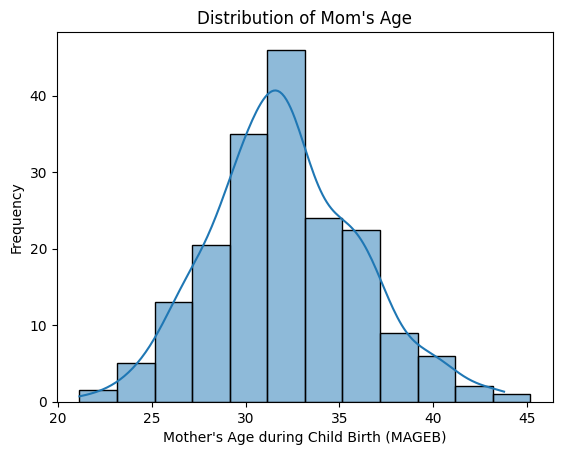

In [ ]:
sns.histplot(data=analysisFile, x="MAGEB",kde=True, binwidth=2,stat = 'frequency')
plt.xlabel("Mother's Age during Child Birth (MAGEB)")
plt.title("Distribution of Mom's Age")

it is evident from the above plot that the age range is between 21 - 43. Therefore, dividing the entire dataset into 2 groups: <br>
1. Young Mothers: 21-32 <br>
2. Old Mothers: 33-43 <br>
We will be testing whether there is any difference between these 2 groups in terms of Depression scores (T1MCESD,T2MCESD,T3MCESD,T4MCESD) using Z Test.


In [ ]:
analysisFile['AgeGroup']=analysisFile['MAGEB'].apply(lambda x: '21-32' if x<=32 else '33-43')
analysisFile.head(5)

,ID,Country,M_ETH,M_EDU,M_EMP,MAGEB,CGEN,MHXD,MumLAD,T1MCESD,...,T2MCTS,T3MCTS,T4MCTS,T1MPSEF,T2MPSEF,T2DOR,T3BITSEA_T,T4SDQ_I,T4SDQ_E,AgeGroup
0,1005.0,UK,White,Masters,Full Time,31.10,Female,No Prior History of Depression‎/Anxiety,0.062616,0.055290,...,0.048115,0.043466,0.048384,0.049439,0.035649,0.046112,0.046780,0.044130,0.060081,21-32
1,1006.0,UK,White,Masters,Full Time,36.91,Female,No Prior History of Depression‎/Anxiety,0.057955,0.073720,...,0.048115,0.052159,0.051840,0.045865,0.051246,0.057189,0.055690,0.051485,0.040054,33-43
2,1012.0,UK,White,Masters,Full Time,33.23,Male,No Prior History of Depression‎/Anxiety,0.060321,0.046075,...,0.056707,0.053898,0.050112,0.051821,0.053474,0.057189,0.071283,0.088260,0.060081,33-43
3,1014.0,UK,White,Bachelors,Part Time,31.30,Male,No Prior History of Depression‎/Anxiety,0.046406,0.032252,...,0.046397,0.055637,0.053568,0.045269,0.032864,0.048159,0.066828,0.014710,0.052070,21-32
4,1020.0,UK,White,Masters,Part Time,34.44,Male,No Prior History of Depression‎/Anxiety,0.064912,0.055290,...,0.046397,0.052159,0.055296,0.048247,0.043448,0.049122,0.060145,0.029420,0.068092,33-43


In [ ]:
print(len(analysisFile[analysisFile['AgeGroup']=='21-32']))
print(len(analysisFile[analysisFile['AgeGroup']=='33-43']))

193
178


In [ ]:
ageWiseGroup=analysisFile.groupby('AgeGroup')[['T1MCESD','T2MCESD','T3MCESD','T4MCESD']].mean()
ageWiseGroup.columns=[columnNameExpansion.get(key,key) for key in ageWiseGroup.columns]
ageWiseGroup

,T1 Mum Depression Summed Score,T2 Mum Depression Summed Score,T3 Mum Depression Summed Score,T4 Mum Depression Summed Score
AgeGroup,,,,
21-32,0.045985,0.042898,0.042129,0.041798
33-43,0.042473,0.037604,0.038759,0.037316


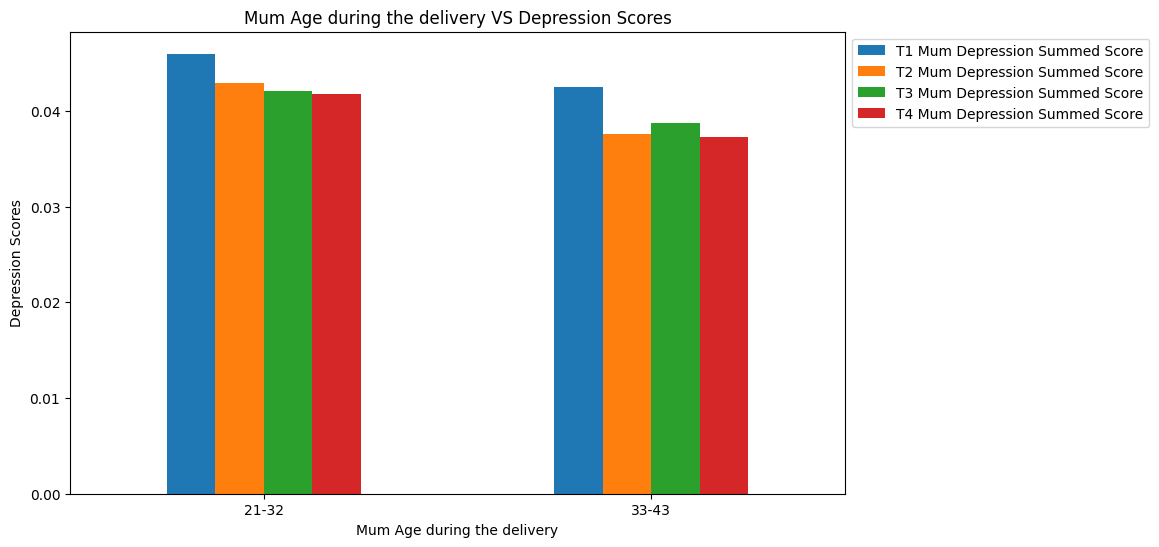

In [ ]:
ageWiseGroup.plot(kind='bar', title='Mum Age during the delivery VS Depression Scores', ylabel='Depression Scores',xlabel='Mum Age during the delivery', figsize=(10,6))
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1, 1.0), loc='upper left')
plt.show()

From the above plot, it could be seen that there is a small difference in the depression scores for both the age groups. However, to conclude whether the difference is statistically significant or not, Z Test would be used. <br>
<br>
**Hypothesis Testing Using ZTest:** <br>
Null Hypothesis:  There is no significant relationship between MAGEB (Mum Age at Birth of First Child) and the Depression scores from T1 - T4.<br>
Alternate Hypothesis: There is a significant relationship between MAGEB(Mum Age at Birth of First Child) and the Depression Scores from T1- T4


In [ ]:
#Creating 2 different dataframes based on the age group.
youngMothersGroup=analysisFile[analysisFile['AgeGroup']=='21-32']
oldMothersGroup=analysisFile[analysisFile['AgeGroup']=='33-43']

In [ ]:
#For both the age groups, i will be checking whether there is any significant difference in the depression scores from T1-T4 using Z Test
#This Test checks whether the depression scores with respect to the age groups is significant or not
def zTest(columns,dataFrame1,dataFrame2):
  for i in columns:
    group1=dataFrame1[i]
    group2=dataFrame2[i]

    zValue, pValue = ztest(group1,group2) #statsmodels.stats.weightstats.ztest is a method that can be used for conducting a ztest
    print("For",[value for key,value in columnNameExpansion.items() if key==i])
    print("zValue:",zValue)
    print("pValue:",pValue)
    print("------------------------------------------")

depressionColumn=['T1MCESD','T2MCESD','T3MCESD','T4MCESD']   #Only the depression scores are analysed across T1-T4
zTest(depressionColumn,youngMothersGroup,oldMothersGroup)

For ['T1 Mum Depression Summed Score']
zValue: 1.247629611146364
pValue: 0.21216672932414038
------------------------------------------
For ['T2 Mum Depression Summed Score']
zValue: 1.5610233619062204
pValue: 0.11851823881801626
------------------------------------------
For ['T3 Mum Depression Summed Score']
zValue: 0.9972542896204619
pValue: 0.31864109511959626
------------------------------------------
For ['T4 Mum Depression Summed Score']
zValue: 1.2861453435868522
pValue: 0.1983923418118294
------------------------------------------


zValue indicates the level of association between the 2 variables and p-value indicates the probability whether the association is statistically significant or not. <br>
Here, all the p-values are greater than 0.05, therefore we cannot reject the Null Hypothesis and thus could conclude that, "There is no significant relationship between MAGEB (Mum Age at Birth of First Child) and the Depression scores from T1 - T4". The difference in depression values across time in both the age groups is random and due to chance. <br><br>

Changes in MAGEB does not contribute in depression scores.

2. Child Gender (CGEN)<br>
Checking whether a specific gender of a baby contributes in Postpartum Depression in mothers.

In [ ]:
childGender=mainFile.groupby('CGEN')[['T2MCESD','T3MCESD','T4MCESD']].mean()
childGender.columns=[columnNameExpansion.get(key,key) for key in childGender.columns]
key=[value for key,value in columnNameExpansion.items() if key==childGender.index.name]
childGender=childGender.rename_axis(key)
childGender

,T2 Mum Depression Summed Score,T3 Mum Depression Summed Score,T4 Mum Depression Summed Score
Child Gender,,,
Female,0.040451,0.038962,0.039566
Male,0.040269,0.042005,0.039726


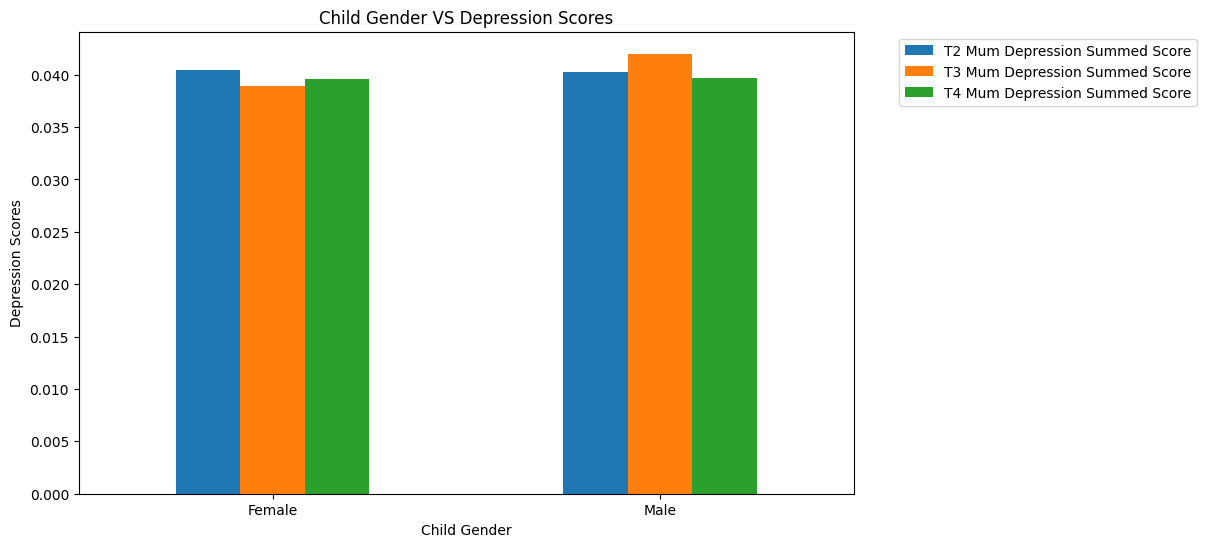

In [ ]:
childGender.plot(kind='bar', title='Child Gender VS Depression Scores', ylabel='Depression Scores',xlabel='Child Gender', figsize=(10,6))
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

From the above plot, it could be seen that there is a small difference in the depression scores for both the age groups. However, to conclude whether the difference is statistically significant or not, Z Test would be used. <br>
<br>
**Hypothesis Testing Using ZTest:** <br>
Null Hypothesis:  There is no significant relationship between CGEN (Child Gender) and the Depression scores from T2 - T4.<br>
Alternate Hypothesis: There is a significant relationship between CGEN (Child Gender) and the Depression Scores from T2- T4


In [ ]:
#Dividing the dataframe into 2 groups based on the child gender
femaleGroup=analysisFile[analysisFile['CGEN']=='Female']
maleGroup=analysisFile[analysisFile['CGEN']=='Male']

#Z test
columns=['T2MCESD','T3MCESD','T4MCESD']
zTest(columns,femaleGroup,maleGroup)

For ['T2 Mum Depression Summed Score']
zValue: 0.05350258447752729
pValue: 0.9573314714853822
------------------------------------------
For ['T3 Mum Depression Summed Score']
zValue: -0.9011889842578016
pValue: 0.367487846919342
------------------------------------------
For ['T4 Mum Depression Summed Score']
zValue: -0.04567551063551181
pValue: 0.9635688831140825
------------------------------------------


Here, all the p-values are greater than 0.05, therefore we cannot reject the Null Hypothesis and thus could conclude that, "There is no significant relationship between CGEN (Child Gender) and the Depression scores from T1 - T4". The difference in depression values across time in both the genders is random and due to chance. <br><br>

Changes in CGEN does not contribute in depression scores.

3. Depression History in Mothers <br>
Checking whether mothers who have had a history of depression can have Maternal Depression.

In [ ]:
mumHistory=mainFile.groupby('MHXD')[['T1MCESD','T2MCESD','T3MCESD','T4MCESD']].mean()
mumHistory.columns = [columnNameExpansion.get(key, key) for key in mumHistory.columns]
key=[value for key,value in columnNameExpansion.items() if key==mumHistory.index.name]
mumHistory=mumHistory.rename_axis(key)
mumHistory

,T1 Mum Depression Summed Score,T2 Mum Depression Summed Score,T3 Mum Depression Summed Score,T4 Mum Depression Summed Score
Mum History of Depression/Anxiety Prior to Pregnancy,,,,
No Prior History of Depression‎/Anxiety,0.042031,0.038082,0.038273,0.037547
Previously diagnosed with Depression‎/Anxiety,0.055829,0.051924,0.051891,0.050320


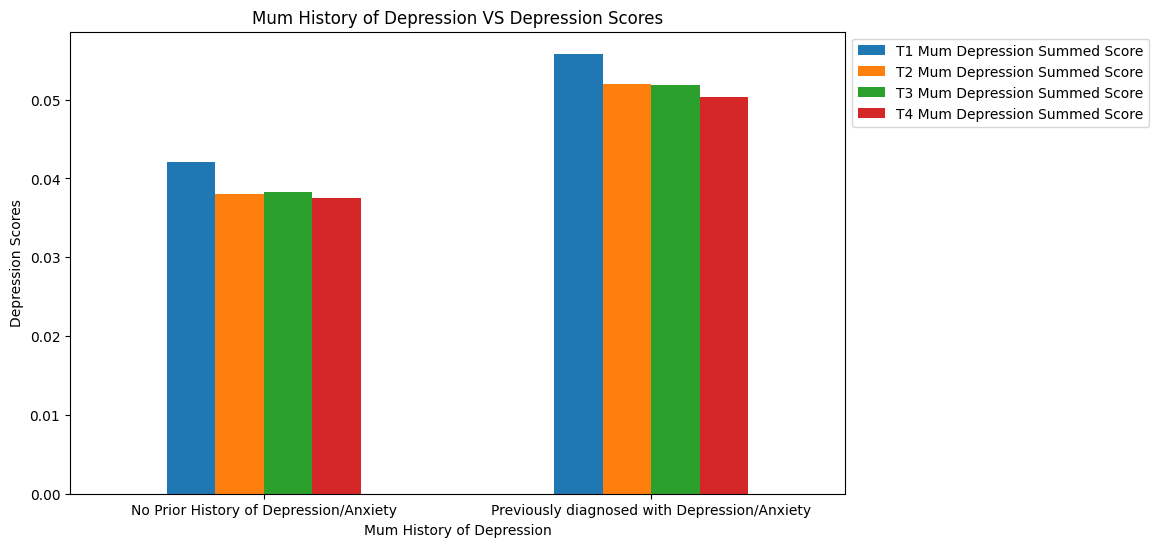

In [ ]:
mumHistory.plot(kind='bar', title='Mum History of Depression VS Depression Scores', ylabel='Depression Scores',xlabel='Mum History of Depression', figsize=(10,6))
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1, 1.0), loc='upper left')
plt.show()

From the above plot, it could be seen that there is a significant difference in the depression scores for both the groups. However, to conclude whether the difference is statistically significant or not, Z Test would be used. <br>
<br>
**Hypothesis Testing Using ZTest:**<br>
Null Hypothesis: There is no significant relationship between MHXD (Depression History) and the Depression scores from T1 - T4.<br>
Alternate Hypothesis: There is significant relationship between MHXD(Depression History) and the Depression Scores from T1- T4


In [ ]:
#Dividing the dataframe into 2 groups based on the child gender
noHistory=analysisFile[analysisFile['MHXD']=='No Prior History of Depression‎/Anxiety']
history=analysisFile[analysisFile['MHXD']=='Previously diagnosed with Depression‎/Anxiety']

#Z Test
columns=['T1MCESD','T2MCESD','T3MCESD','T4MCESD']
zTest(columns,noHistory,history)

For ['T1 Mum Depression Summed Score']
zValue: -3.695317260426675
pValue: 0.00021961238693003713
------------------------------------------
For ['T2 Mum Depression Summed Score']
zValue: -3.0555807260660717
pValue: 0.0022462512502053693
------------------------------------------
For ['T3 Mum Depression Summed Score']
zValue: -3.023131972990574
pValue: 0.002501731163246923
------------------------------------------
For ['T4 Mum Depression Summed Score']
zValue: -2.740725574074155
pValue: 0.006130368555070566
------------------------------------------


Here, all the p-values are less than 0.05, therefore we can reject the Null Hypothesis and accept the Alternate Hypothesis. It could be concluded that, "There is a significant relationship between MHXD (Depression History) and the Depression scores from T1 - T4". The difference in depression values across time in both the genders is not due to chance. <br>

These results suggests that maternal depression scores(T1MCESD, T2MCESD, T3MCESD, T4MCESD)  differ significantly between mothers who had a depression history and with those who did not have it. <br>

From the above Mum History of Depression VS Depression Scores, it is evident that the mothers who have had a history of depression have higher deprssive symptoms across all 4 stages than the mothers who did not have a history of depression. <br>
Therefore, we can conclude that mothers who have had a history of depression before pregnancy have higher depressive symtoms.  

**Using Kruskal Walis Test**

Kruskal Walis Test will be used for checking the statistical significance of the below groups: <br>
1. Mum Ethnicity (M_ETH) <br>
2. Mum Education (M_EDU) <br>
3. Mum Employment Status (M_EMP)

In [ ]:
ethinicity=mainFile.groupby('M_ETH')[['T1MCESD','T2MCESD','T3MCESD','T4MCESD']].mean()
ethinicity.columns = [columnNameExpansion.get(key, key) for key in ethinicity.columns]
key=[value for key,value in columnNameExpansion.items() if key==ethinicity.index.name]
ethinicity=ethinicity.rename_axis(key)
ethinicity

,T1 Mum Depression Summed Score,T2 Mum Depression Summed Score,T3 Mum Depression Summed Score,T4 Mum Depression Summed Score
Mum Ethnicity,,,,
Asian,0.046766,0.048574,0.037662,0.034771
Black,0.043003,0.025223,0.033687,0.038366
Other,0.054632,0.053002,0.053155,0.036250
White,0.043963,0.039879,0.040540,0.040029


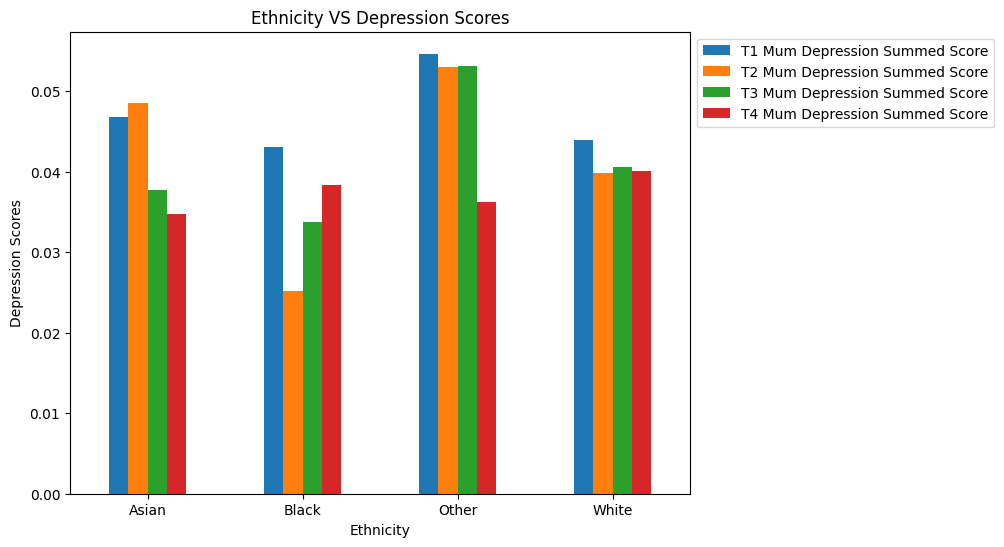

In [ ]:
ethinicity.plot(kind='bar', title='Ethnicity VS Depression Scores', ylabel='Depression Scores',xlabel='Ethnicity', figsize=(8,6))
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

From the above plot, it could be seen that there is a significant difference in the depression scores for all the ethnicity groups. However, to conclude whether the difference is statistically significant or not, Kruskal Walis Test would be used. <br>
<br>



In [ ]:
education=mainFile.groupby('M_EDU')[['T1MCESD','T2MCESD','T3MCESD','T4MCESD']].mean()
education.columns = [columnNameExpansion.get(key, key) for key in education.columns]
key=[value for key,value in columnNameExpansion.items() if key==education.index.name]
education=education.rename_axis(key)
education

,T1 Mum Depression Summed Score,T2 Mum Depression Summed Score,T3 Mum Depression Summed Score,T4 Mum Depression Summed Score
Mum Prenatal: Highest Level of Education,,,,
Bachelors,0.040126,0.040523,0.039841,0.038708
Doctoral,0.045990,0.038889,0.044606,0.040039
Masters,0.043607,0.038949,0.037733,0.038638
Post-Secondary Not Tertiary,0.056058,0.044343,0.053592,0.058572
Short-Cycle Tertiary,0.056211,0.043936,0.037185,0.035127
Upper Secondary,0.048985,0.043423,0.047340,0.046788


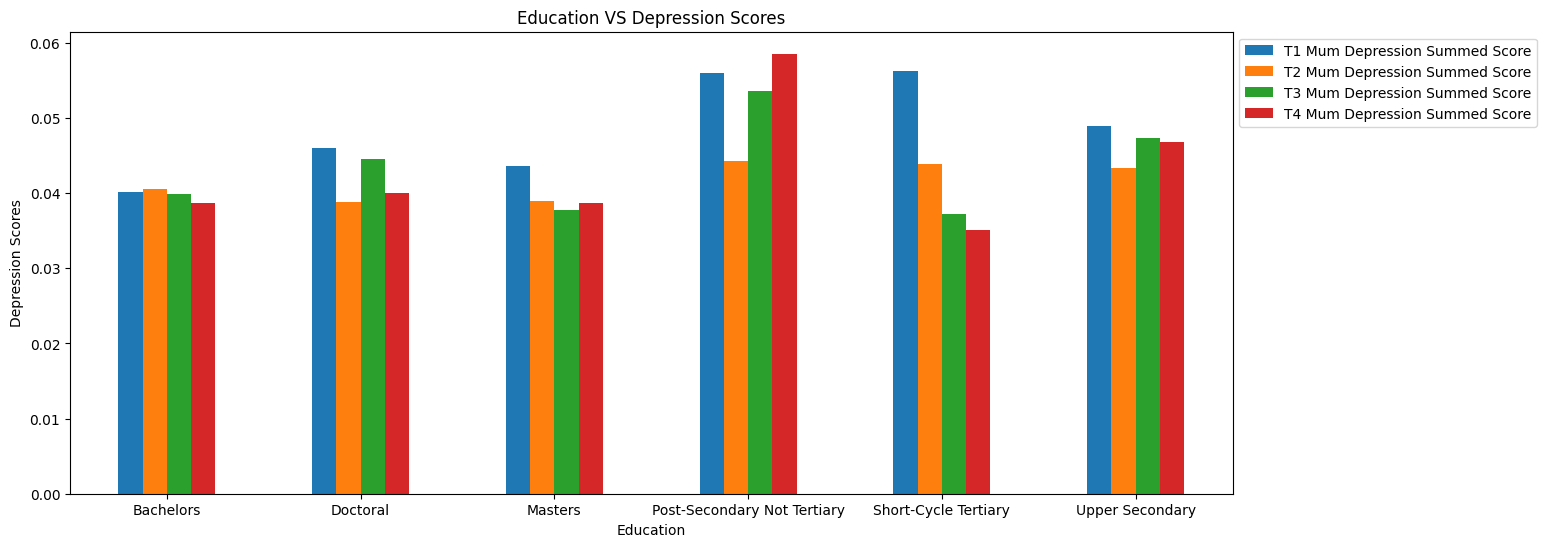

In [ ]:
education.plot(kind='bar', title='Education VS Depression Scores', ylabel='Depression Scores',xlabel='Education', figsize=(15,6))
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

From the above plot, it could be seen that there is a significant difference in the depression scores for all the ethnicity groups. However, to conclude whether the difference is statistically significant or not, Kruskal Walis Test would be used. <br>
<br>



In [ ]:
employment=mainFile.groupby('M_EMP')[['T1MCESD','T2MCESD','T3MCESD','T4MCESD']].mean()
employment.columns = [columnNameExpansion.get(key, key) for key in employment.columns]
key=[value for key,value in columnNameExpansion.items() if key==employment.index.name]
employment=employment.rename_axis(key)
employment

,T1 Mum Depression Summed Score,T2 Mum Depression Summed Score,T3 Mum Depression Summed Score,T4 Mum Depression Summed Score
Mum Prenatal: Employment Status,,,,
Full Time,0.043578,0.039283,0.039093,0.038897
Home Maker,0.040615,0.028680,0.043065,0.028872
Part Time,0.046387,0.042532,0.040645,0.036840
Seeking Employment,0.057571,0.058093,0.071201,0.069782
Student,0.042405,0.047928,0.045936,0.053169


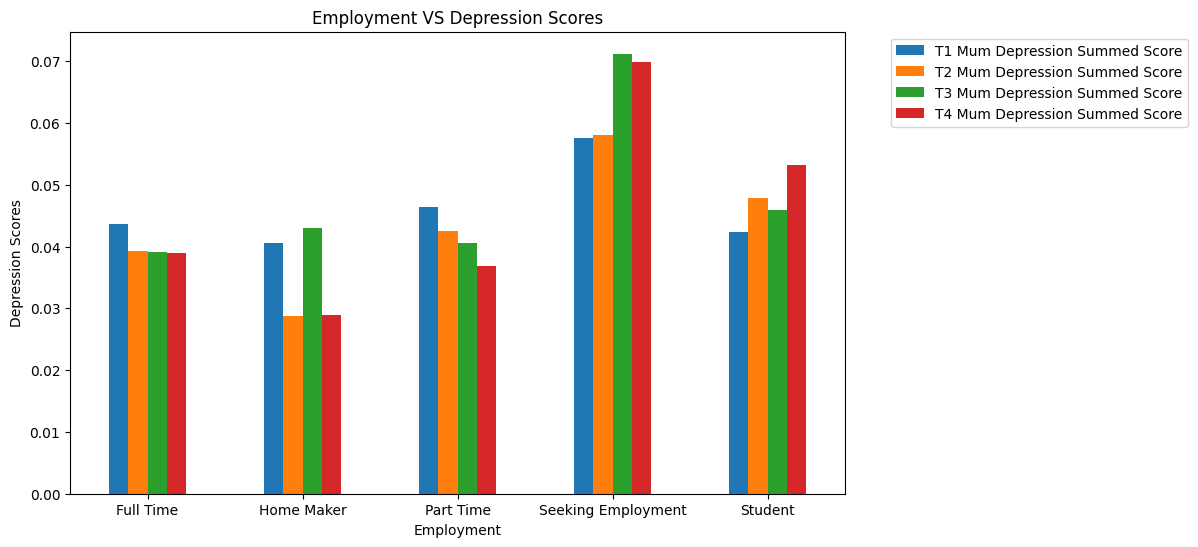

In [ ]:
employment.plot(kind='bar', title='Employment VS Depression Scores', ylabel='Depression Scores',xlabel='Employment', figsize=(10,6))
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

From the above plot, it could be seen that there is a significant difference in the depression scores for all the ethnicity groups. However, to conclude whether the difference is statistically significant or not, Kruskal Walis Test would be used. <br>
<br>



**Hypothesis Testing Using Kruskal Walis Test for Mum's Ethnicity:**<br>
Null Hypothesis: Population median for all the ethnicity groups are same with respect to the Depression scores from T1-T4.<br>
Alternate Hypothesis: Population median for all the ethnicity groups are not the same with respect to the Depression scores from T1-T4. <br><br>

**Hypothesis Testing Using Kruskal Walis Test for Mum's Education:**<br>
Null Hypothesis: Population median for all the education groups are same with respect to the Depression scores from T1-T4.<br>
Alternate Hypothesis: Population median for all the education groups are not the same with respect to the Depression scores from T1-T4. <br><br>

**Hypothesis Testing Using Kruskal Walis Test for Mum's Employment:**<br>
Null Hypothesis: Population median for all the employment groups are same with respect to the Depression scores from T1-T4.<br>
Alternate Hypothesis: Population median for all the employment groups are not the same with respect to the Depression scores from T1-T4. <br><br>

In [ ]:
def groupsForKruskal(columnName,depressionVar,values):
  group=[]
  for j in values:
    group.append(analysisFile[analysisFile[columnName]==j][depressionVar])
  return group

def kruskalCalculation(col,dep):
  group=[]
  for i in col:
    for key,value in i.items():
      for j in dep:
        group=groupsForKruskal(key,j,value)
        statistic, p_value = kruskal(*group)
        results_table = [["Statistic", statistic], ["P-Value", p_value]]
        keyExpansion=[value for k,value in columnNameExpansion.items() if k==key]
        depExpansion=[value for k,value in columnNameExpansion.items() if k==j]
        print("For",keyExpansion,"with",depExpansion)
        print(tabulate(results_table, headers=["Test", "Value"], tablefmt="pretty"))

In [ ]:
variables = [
    {'M_ETH': analysisFile['M_ETH'].unique()},
    {'M_EMP': analysisFile['M_EMP'].unique()},
    {'M_EDU': analysisFile['M_EDU'].unique()},
]
kruskalCalculation(variables,['T1MCESD','T2MCESD','T3MCESD','T4MCESD'])

For ['Mum Ethnicity'] with ['T1 Mum Depression Summed Score']
+-----------+--------------------+
|   Test    |       Value        |
+-----------+--------------------+
| Statistic | 1.539872864338576  |
|  P-Value  | 0.6730987362540619 |
+-----------+--------------------+
For ['Mum Ethnicity'] with ['T2 Mum Depression Summed Score']
+-----------+--------------------+
|   Test    |       Value        |
+-----------+--------------------+
| Statistic | 3.325897213708565  |
|  P-Value  | 0.3440544687699206 |
+-----------+--------------------+
For ['Mum Ethnicity'] with ['T3 Mum Depression Summed Score']
+-----------+--------------------+
|   Test    |       Value        |
+-----------+--------------------+
| Statistic | 1.418812573891532  |
|  P-Value  | 0.7011309450338225 |
+-----------+--------------------+
For ['Mum Ethnicity'] with ['T4 Mum Depression Summed Score']
+-----------+--------------------+
|   Test    |       Value        |
+-----------+--------------------+
| Statistic | 0.7

All the p-values for all 3 columns [Mum's ethnicity, Mum's Education status, Mum's Employment Status] are greater than the significance level 0.05 which means we do not have enough proof to reject the Null Hypothesis for all the 3 variables. Population median for all the ethnicity groups, education groups and employment groups are same with respect to the Depression scores from T1-T4.<br>

It means that the difference in the values across values for each variable is due to random fluctuation and are due to chance.

Therefore, the values of Ethnicity, Education, and Employment does not affect mothers' mental health.

**Using Kendall's Correlation Coefficient**<br><br>
The link between the depression scores and all of the factors like Mum’s Ladder of Subjective Social Standing, Support from family, Friends, and Special Person, Couple Satisfaction Score, Conflict Tactics Score, Self-Efficacy score were examined using Kendall's Correlation Rank Coefficient, which measures the intensity and direction of correlation between each feature and the depression scores.

In [ ]:
#For calculating Kendall's Correlation Coefficient
def kendallTau(columnName,x,y):
  results=[]
  for i in columnName:
    tau, pvalue = scipy.stats.kendalltau(x[i],y)
    results.append((tau,pvalue))
  kendall=pd.DataFrame(results, columns=['Tau','Pvalue'],index=columnName)
  return kendall

In [ ]:
def kendallScoresatDifferentStages(columnNames, parameters):
  for i in parameters:
    print("For",columnNameExpansion.get(i, i))
    print(tabulate(kendallTau(columnNames,analysisFile.drop(columns=[i]),analysisFile[i]),headers='keys',tablefmt='mixed_grid'))


#Checking for factors that can affect depression at T1.
kendallScoresatDifferentStages(['T1MCESD'],['T1MFAM', 'T1MFRI','T1MSPE','T1MCSIT','T1MCTS','T1MPSEF'])

For T1 Mum Support from Family 
┍━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━┑
│         │       Tau │      Pvalue │
┝━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━┥
│ T1MCESD │ -0.148384 │ 6.88895e-05 │
┕━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━┙
For T1 Mum Support from Friends 
┍━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━┑
│         │       Tau │      Pvalue │
┝━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━┥
│ T1MCESD │ -0.141457 │ 0.000143523 │
┕━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━┙
For T1 Mum Support from special Person 
┍━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┑
│         │        Tau │    Pvalue │
┝━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┥
│ T1MCESD │ -0.0643371 │ 0.0955032 │
┕━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┙
For Mum T1 Couple Satisfaction Total Summed Score 
┍━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━┑
│         │       Tau │      Pvalue │
┝━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━┥
│ T1MCESD │ -0.231652 │ 2.45255e-10 │
┕━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━┙
For Mum T1 Conflict Tactics Scale 
┍━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━┑
│         │     

In [ ]:
kendallScoresatDifferentStages(['T2MCESD'],['MumLAD','T2MFAM', 'T2MFRI','T2MSPE','T2MCSIT','T2MCTS','T2MPSEF'])

For Mom Mean Rating on Ladder of Subjective Social Standing
┍━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━┑
│         │       Tau │      Pvalue │
┝━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━┥
│ T2MCESD │ -0.165068 │ 7.78855e-06 │
┕━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━┙
For T2 Mum Support from Family 
┍━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━┑
│         │       Tau │      Pvalue │
┝━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━┥
│ T2MCESD │ -0.133344 │ 0.000334958 │
┕━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━┙
For T2 Mum Support from Friends 
┍━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━┑
│         │       Tau │      Pvalue │
┝━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━┥
│ T2MCESD │ -0.151734 │ 4.15309e-05 │
┕━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━┙
For T2 Mum Support from special Person 
┍━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━━┑
│         │        Tau │     Pvalue │
┝━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━━┥
│ T2MCESD │ -0.0996629 │ 0.00952763 │
┕━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━━┙
For Mum T2 Couple Satisfaction Total Summed Score 
┍━━━━━━━━━┯━━━━━━━━━━━┯━

In [ ]:
kendallScoresatDifferentStages(['T3MCESD'],['MumLAD','T3MFAM', 'T3MFRI','T3MSPE','T3MCSIT','T3MCTS'])

For Mom Mean Rating on Ladder of Subjective Social Standing
┍━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━┑
│         │       Tau │     Pvalue │
┝━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━┥
│ T3MCESD │ -0.115728 │ 0.00167674 │
┕━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━┙
For T3 Mum Support from Family 
┍━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━┑
│         │       Tau │      Pvalue │
┝━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━┥
│ T3MCESD │ -0.224912 │ 1.24306e-09 │
┕━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━┙
For T3 Mum Support from Friends 
┍━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━┑
│         │       Tau │      Pvalue │
┝━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━┥
│ T3MCESD │ -0.246604 │ 2.78374e-11 │
┕━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━┙
For T3 Mum Support from special Person 
┍━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━┑
│         │       Tau │      Pvalue │
┝━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━┥
│ T3MCESD │ -0.144601 │ 0.000161604 │
┕━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━┙
For Mum T3 Couple Satisfaction Total Summed Score 
┍━━━━━━━━━┯━━━━━━━━━┯━━━━━━━━

In [ ]:
kendallScoresatDifferentStages(['T4MCESD'],['MumLAD','T4MFAM', 'T4MFRI','T4MSPE','T4MCSIT','T4MCTS'])

For Mom Mean Rating on Ladder of Subjective Social Standing
┍━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━┑
│         │       Tau │      Pvalue │
┝━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━┥
│ T4MCESD │ -0.137393 │ 0.000183358 │
┕━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━┙
For T4 Mum Support from Family 
┍━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━┑
│         │       Tau │      Pvalue │
┝━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━┥
│ T4MCESD │ -0.253216 │ 5.72206e-12 │
┕━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━┙
For T4 Mum Support from Friends 
┍━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━┑
│         │       Tau │      Pvalue │
┝━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━┥
│ T4MCESD │ -0.269939 │ 2.32041e-13 │
┕━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━┙
For T4 Mum Support from special Person 
┍━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━┑
│         │       Tau │      Pvalue │
┝━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━┥
│ T4MCESD │ -0.206645 │ 5.06937e-08 │
┕━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━┙
For Mum T4 Couple Satisfaction Total Summed Score 
┍━━━━━━━━━┯━━━━━━━━━━━┯━

All the p-values of High Social Standing, Support from Family, Friends, Couple Satisfaction Total Summed Score, Conflict Tactics Scale, self Efficacy Score are less than the significance level 0.05. Therefore, we can reject the Null Hypothesis and accept the Alternate Hypothesis for all these variables. <br>
The tau value indicates the strength and direction of the association between the 2 variables. +ve values indicates positive correlation whereas -ve value indicates negative correlation. Here, all the values are negative and thus there is a negative correlation. One thing to note, is that COnflict Tactics Scale has been reverse scored which means high scores reflects low levels of conflcit behaviour. <br>

Therefore, the negative tau value for conflict Tactics Scale indicates high conflict Tactics score means less depressive symptoms.  <br>
Therefore, we can conclude the following: <br>
1. More the support from family and friends, less the depressive symptoms in expectant and new mothers. <br>
2. More the Relationship Satisfaction with the partner, less the depressive signs. <br>
3. More the Social standing, less Depression. <br>
4. Less Conflicts with the partner, less depression. <br>
5. More the self-efficacy in a mother, less the depressive symptoms. <br><br>


<b><h3>Objective 2: Predicting Postpartum Depression using past Depression scores</b></h3> <br>


Machine learning techniques present a potential method for forecasting CES-D results based on previous CES-D scores. Regression algorithms like Ridge Regression, Support vector Regression, and Random Forest Regression have been used for the prediction. All the models were evaluated using MSE, RMSE, MAE, and R2-squared scores. This predictive power holds promise for identifying those at risk of experiencing worsened depression symptoms as well as helping them overcome it.

Predicting T2MCESD score based on T1MCESD score

In [ ]:
#CReating a regression model function
def regressionModels(regressionModel,x,y,paramGrid):
  regression_model=[]
  mse=[]
  rmse=[]
  mae=[]
  r2=[]
  mseModel=[]
  rmseModel=[]
  maeModel=[]
  r2Model=[]

  kf = KFold(n_splits=3, shuffle=True, random_state=1)   #KFold Validation
  regression_model.append(regressionModel)
  grid=GridSearchCV(estimator=regressionModel,param_grid=paramGrid,cv=5,verbose=2)   #Hyperparameter Tuning with GridSearchCV

  #Splitting the data into training and testing based on k=3 folds
  for train_index, test_index in kf.split(x):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    grid.fit(X_train,y_train)
    gridPred=grid.predict(X_test)

    #Calculating the metrics for each fold
    mse.append(mean_squared_error(y_test, gridPred, squared=False))
    rmse.append(mean_squared_error(y_test, gridPred))
    mae.append(mean_absolute_error(y_test, gridPred))
    r2.append(r2_score(y_test, gridPred))

  #Averaging the metrics score of all the folds.
  mseModel.append(sum(mse) / len(mse))
  rmseModel.append(sum(rmse) / len(rmse))
  maeModel.append(sum(mae) / len(mae))
  r2Model.append(sum(r2) / len(r2))

  #CReating a new dataframe to store the scores
  df = pd.DataFrame({'Regression Model' : regression_model, 'Mean Square Error': mseModel, 'Root Mean Square Error': rmseModel,'Mean Absolute Error': maeModel,'R2-Square Value': r2Model})
  df = df.reset_index(drop=True)
  return df

In [ ]:
#creating a new dataframe to store the depression scores
cesdData=analysisFile[['T1MCESD', 'T2MCESD', 'T3MCESD', 'T4MCESD']]

#Normalising the values of all the Depression scores.
norm_data = preprocessing.normalize(cesdData, axis=0)
norm_df = pd.DataFrame(norm_data,columns=cesdData.columns)
cesdData = pd.concat([cesdData.drop(cesdData.columns, axis=1), norm_df], axis=1)
cesdData.head(5)

,T1MCESD,T2MCESD,T3MCESD,T4MCESD
0,0.055290,0.170862,0.041343,0.037917
1,0.073720,0.024409,0.045936,0.033704
2,0.046075,0.000000,0.064311,0.029491
3,0.032252,0.146453,0.101060,0.042130
4,0.055290,0.034172,0.009187,0.029491


In [ ]:
#Creating x and y variables x= T1MCESD, y=T2MCESD
x_cesd1=cesdData.iloc[:,:1]
y_cesd1=cesdData.iloc[:,1]

1. Ridge Regression

In [ ]:
ridge=Ridge()
ridgeParam={
    'alpha': [1.0,0.1,0.01,10]
}
ridgeModel1=regressionModels(ridge,x_cesd1,y_cesd1, ridgeParam)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ........................................

2. Random Forest Regressor

In [ ]:
rf = RandomForestRegressor()
rf_param_grid={
    'n_estimators': np.arange(100,500,100),
    'max_depth':[3,5],
    'criterion':['squared_error','absolute_error','friedman_mse','poisson']

}
rfRegressor1=regressionModels(rf,x_cesd1,y_cesd1, rf_param_grid)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END criterion=squared_error, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END criterion=squared_error, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END criterion=squared_error, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END criterion=squared_error, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END criterion=squared_error, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END criterion=squared_error, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END criterion=squared_error, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END criterion=squared_error, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END criterion=squared_error, max_depth=3, n_estimators=200; total time=   0.5s
[CV] END criterion=squared_error, max_depth=3, n_estimators=200; total time=   0.5s
[CV] END criterion=squared_error, max_depth=3, n_estimators=300; total time=   0.7s
[CV] END crite

3. Support Vector Regressor

In [ ]:
svr=SVR()
svr_param={
    'kernel': ['linear','poly','rbf','sigmoid'],
    'degree': [2,3,4,5],
    'gamma': ['scale','auto'],
    'epsilon':[0.1,0.01,1,10]
}
svr1=regressionModels(svr,x_cesd1,y_cesd1, svr_param)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END ..degree=2, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..degree=2, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..degree=2, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..degree=2, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..degree=2, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....degree=2, epsilon=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....degree=2, epsilon=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....degree=2, epsilon=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....degree=2, epsilon=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....degree=2, epsilon=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .....degree=2, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....degree=2, epsilon=0.1, gamma=sca

In [ ]:
print("Predicting Depression Score at T2 using Depression Score at T1")
df1=pd.concat([ridgeModel1,rfRegressor1,svr1], axis=0)
df1.reset_index(drop=True)

Predicting Depression Score at T2 using Depression Score at T1


,Regression Model,Mean Square Error,Root Mean Square Error,Mean Absolute Error,R2-Square Value
0,Ridge(),0.028970,0.000842,0.021900,0.202577
1,RandomForestRegressor(),0.029981,0.000900,0.022155,0.143067
2,SVR(),0.030149,0.000910,0.021948,0.133548


Based on the above values, RIdge Regression has performed better than the other 2 models.

Predicting T3MCESD using T1MCESD and T2MCESD

In [ ]:
#Creating x and y variables x= T1MCESD, T2MCESD, y=T3MCESD
x_cesd2=cesdData.iloc[:,:2]
y_cesd2=cesdData.iloc[:,2]

1. Ridge Regression

In [ ]:
ridgeModel2=regressionModels(ridge,x_cesd2,y_cesd2, ridgeParam)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ........................................

2. Random Forest Regressor

In [ ]:
rfModel2=regressionModels(rf,x_cesd2,y_cesd2, rf_param_grid)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END criterion=squared_error, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END criterion=squared_error, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END criterion=squared_error, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END criterion=squared_error, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END criterion=squared_error, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END criterion=squared_error, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END criterion=squared_error, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END criterion=squared_error, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END criterion=squared_error, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END criterion=squared_error, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END criterion=squared_error, max_depth=3, n_estimators=300; total time=   0.4s
[CV] END crite

3. Support Vector Regressor

In [ ]:
svrModel2=regressionModels(svr,x_cesd2,y_cesd2, svr_param)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END ..degree=2, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..degree=2, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..degree=2, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..degree=2, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..degree=2, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....degree=2, epsilon=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....degree=2, epsilon=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....degree=2, epsilon=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....degree=2, epsilon=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....degree=2, epsilon=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .....degree=2, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....degree=2, epsilon=0.1, gamma=sca

In [ ]:
print("Predicting Depression Score at T3 using Depression Scores at T1 and T2")
df2=pd.concat([ridgeModel2,rfModel2,svrModel2], axis=0)
df2.reset_index(drop=True)

Predicting Depression Score at T3 using Depression Scores at T1 and T2


,Regression Model,Mean Square Error,Root Mean Square Error,Mean Absolute Error,R2-Square Value
0,Ridge(),0.026834,0.000722,0.020159,0.314090
1,RandomForestRegressor(),0.027431,0.000753,0.019718,0.281111
2,SVR(),0.026913,0.000725,0.019599,0.310617


Based on the above values, RIdge Regression has performed better than the other 2 models.

Predicting T4MCESD using T1MCESD, T2MCESD and T3MCESD

In [ ]:
#Creating x and y variables x= T1MCESD, T2MCESD, T3MCESD, y=T4MCESD
x_cesd3=cesdData.iloc[:,:3]
y_cesd3=cesdData.iloc[:,3]

1. Ridge Regression

In [ ]:
ridgeModel3=regressionModels(ridge,x_cesd3,y_cesd3, ridgeParam)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ........................................

2. Random Forest Regressor

In [ ]:
rfModel3=regressionModels(rf,x_cesd3,y_cesd3, rf_param_grid)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END criterion=squared_error, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END criterion=squared_error, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END criterion=squared_error, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END criterion=squared_error, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END criterion=squared_error, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END criterion=squared_error, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END criterion=squared_error, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END criterion=squared_error, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END criterion=squared_error, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END criterion=squared_error, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END criterion=squared_error, max_depth=3, n_estimators=300; total time=   0.7s
[CV] END crite

3. Support Vector Regressor

In [ ]:
svrModel3=regressionModels(svr,x_cesd3,y_cesd3, svr_param)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END ..degree=2, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..degree=2, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..degree=2, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..degree=2, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..degree=2, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....degree=2, epsilon=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....degree=2, epsilon=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....degree=2, epsilon=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....degree=2, epsilon=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....degree=2, epsilon=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .....degree=2, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....degree=2, epsilon=0.1, gamma=sca

In [ ]:
print("Predicting Depression Score at T4 using Depression Scores at T1, T2, and T3")
df3=pd.concat([ridgeModel3,rfModel3,svrModel3], axis=0)
df3.reset_index(drop=True)

Predicting Depression Score at T4 using Depression Scores at T1, T2, and T3


,Regression Model,Mean Square Error,Root Mean Square Error,Mean Absolute Error,R2-Square Value
0,Ridge(),0.024614,0.000608,0.017957,0.454033
1,RandomForestRegressor(),0.025200,0.000638,0.018238,0.429354
2,SVR(),0.024832,0.000619,0.017850,0.445705


Based on the above values, RIdge Regression has performed better than the other 2 models.

<b><h3>Objective 3: How can depression in mothers affect a child’s behaviour?</b></h3> <br>
We will predict whether a 14-month-old baby will have social and emotional issues or not based on the depression patterns of his/her mother. Social and Emotional Issues have been assessed using Brief Infant Toddler Social and Emotional Assessment (BITSEA) . This research has also explored the child’s mental health issues if any at the age of 2 years using the Strengths and Difficulties Questionnaire (SDQ) with both internalizing(T4SQD_I) and externalizing (T4SDQ_E) behaviour analysis.

In [ ]:
#Creating a dataset with child data and depression scores
childData=analysisFile[['T1MCESD','T2MCESD','T3MCESD','T4MCESD','T3BITSEA_T','T4SDQ_I','T4SDQ_E']]
childData.head(5)

,T1MCESD,T2MCESD,T3MCESD,T4MCESD,T3BITSEA_T,T4SDQ_I,T4SDQ_E
0,0.055290,0.170862,0.041343,0.037917,0.046780,0.044130,0.060081
1,0.073720,0.024409,0.045936,0.033704,0.055690,0.051485,0.040054
2,0.046075,0.000000,0.064311,0.029491,0.071283,0.088260,0.060081
3,0.032252,0.146453,0.101060,0.042130,0.066828,0.014710,0.052070
4,0.055290,0.034172,0.009187,0.029491,0.060145,0.029420,0.068092


1. Depression vs T3BITSEA_T score

In [ ]:
#Creating a dataset with the depression scores and the T3BITSEA_T
T3childData=childData[['T1MCESD','T2MCESD','T3MCESD','T3BITSEA_T']]
T3childData.columns = [columnNameExpansion.get(key, key) for key in T3childData.columns]
T3childData

,T1 Mum Depression Summed Score,T2 Mum Depression Summed Score,T3 Mum Depression Summed Score,T3 Brief Infant-Toddler Social and Emotional Assessment Score
0,0.055290,0.170862,0.041343,0.046780
1,0.073720,0.024409,0.045936,0.055690
2,0.046075,0.000000,0.064311,0.071283
3,0.032252,0.146453,0.101060,0.066828
4,0.055290,0.034172,0.009187,0.060145
...,...,...,...,...
366,0.032252,0.009764,0.032155,0.021430
367,0.055290,0.131808,0.091688,0.037918
368,0.050682,0.029291,0.009187,0.033414
369,0.041467,0.024409,0.027562,0.035642


In [ ]:
#Spilitting the data into x and y; x= T1MCESD,T2MCESD,T3MCESD, y= T3BITSEA_T
x3ChildData=T3childData.iloc[:,:3]
y3ChildData=T3childData.iloc[:,-1]
x3ChildData

,T1 Mum Depression Summed Score,T2 Mum Depression Summed Score,T3 Mum Depression Summed Score
0,0.055290,0.170862,0.041343
1,0.073720,0.024409,0.045936
2,0.046075,0.000000,0.064311
3,0.032252,0.146453,0.101060
4,0.055290,0.034172,0.009187
...,...,...,...
366,0.032252,0.009764,0.032155
367,0.055290,0.131808,0.091688
368,0.050682,0.029291,0.009187
369,0.041467,0.024409,0.027562


In [ ]:
def childScores(x,y,kfold):
  #k=3
  kf = KFold(n_splits=kfold, shuffle=True, random_state=42)
  mse_child = []
  summaryResults = []

  #Splitting the data into training and testing using k fold cross validation
  for train_index, test_index in kf.split(x):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #USing OLS Regression
    olsT1=sm.OLS(y_train,X_train).fit()

    #PRedicting the values
    y_pred = olsT1.predict(X_test)

    #Calculating the Mean square error
    mse_child.append(mean_squared_error(y_test, y_pred))
    averageMse = sum(mse_child) / len(mse_child)
    #Summary
    summaryResults.append(olsT1.summary())

  return summaryResults, averageMse

In [ ]:
summaryResult,aveMSE=childScores(x3ChildData,y3ChildData,3)
print("Average MSE across folds:", aveMSE)

for fold_num, summary in enumerate(summaryResult, start=1):
  print(f"Summary for Fold {fold_num}:\n")
  print(summary)
  print("=" * 80)

Average MSE across folds: 0.0008636504839318183
Summary for Fold 1:

                                                      OLS Regression Results                                                      
Dep. Variable:     T3 Brief Infant-Toddler Social and Emotional Assessment Score   R-squared (uncentered):                   0.672
Model:                                                                       OLS   Adj. R-squared (uncentered):              0.668
Method:                                                            Least Squares   F-statistic:                              166.4
Date:                                                           Thu, 31 Aug 2023   Prob (F-statistic):                    9.99e-59
Time:                                                                   18:52:47   Log-Likelihood:                          513.03
No. Observations:                                                            247   AIC:                                     -1020.
Df Residuals: 

For all the 3 folds, the R2-squared value is around 0.67-0.70 which means the model has fit recently okay. <br>
For all the 3 folds, almost all the p-values are less than the significant level 0.05, therefore, we can conclude that the relationship between the depression variables and the T3BITSEA_T is significant
The coefficient for each fit is around 0.47 to 0.53 which indicates a moderately strong positive correaltion. Therefore, we can conclude that there is an effect of depression on toddlers aged 12 months. <br>
It means that as an when the value of depression scores in mothers increase, there is a chance that the kid might develop a social and behavioural problems.

2. Depression vs T4SQD_I and T4SDQ_E score <br><br>
Internalising behaviour(T4SQD_I) is a self-directed kind of behaviour. These include social withdrawal, eating disorders. It is so subtle that it goes un-noticed by the parents. And if not given proper treatment and support at the right time, it can even lead to depression and teenage suicide. Externalising behaviour(T4SDQ_E) are generally targeted towards others such as disruptive behaviour, harming others.

In [ ]:
T4childData=childData[['T1MCESD','T2MCESD','T3MCESD','T4MCESD','T4SDQ_I','T4SDQ_E']]
T4childData.columns = [columnNameExpansion.get(key, key) for key in T4childData.columns]
T4childData

,T1 Mum Depression Summed Score,T2 Mum Depression Summed Score,T3 Mum Depression Summed Score,T4 Mum Depression Summed Score,T4 SDQ Internalizing Score,T4 SDQ Externalizing Score
0,0.055290,0.170862,0.041343,0.037917,0.044130,0.060081
1,0.073720,0.024409,0.045936,0.033704,0.051485,0.040054
2,0.046075,0.000000,0.064311,0.029491,0.088260,0.060081
3,0.032252,0.146453,0.101060,0.042130,0.014710,0.052070
4,0.055290,0.034172,0.009187,0.029491,0.029420,0.068092
...,...,...,...,...,...,...
366,0.032252,0.009764,0.032155,0.021065,0.044130,0.008011
367,0.055290,0.131808,0.091688,0.101112,0.073550,0.056076
368,0.050682,0.029291,0.009187,0.021065,0.044130,0.048065
369,0.041467,0.024409,0.027562,0.050556,0.014710,0.032043


In [ ]:
#Spilitting the data into x and y; x= T1MCESD,T2MCESD,T3MCESD,T4MCESD y= 'T4SDQ_I','T4SDQ_E'
x4ChildData=T4childData.iloc[:,:4]
x4ChildData

,T1 Mum Depression Summed Score,T2 Mum Depression Summed Score,T3 Mum Depression Summed Score,T4 Mum Depression Summed Score
0,0.055290,0.170862,0.041343,0.037917
1,0.073720,0.024409,0.045936,0.033704
2,0.046075,0.000000,0.064311,0.029491
3,0.032252,0.146453,0.101060,0.042130
4,0.055290,0.034172,0.009187,0.029491
...,...,...,...,...
366,0.032252,0.009764,0.032155,0.021065
367,0.055290,0.131808,0.091688,0.101112
368,0.050682,0.029291,0.009187,0.021065
369,0.041467,0.024409,0.027562,0.050556


In [ ]:
y4ChildData_I=T4childData.iloc[:,-2]
y4ChildData_E=T4childData.iloc[:,-1]

Determining the significance of T4 Internalising Score

In [ ]:
summaryResult,aveMSE=childScores(x4ChildData,y4ChildData_I,5)
print("Average MSE across folds:", aveMSE)

for fold_num, summary in enumerate(summaryResult, start=1):
  print(f"Summary for Fold {fold_num}:\n")
  print(summary)
  print("=" * 80)

Average MSE across folds: 0.0011508285305514131
Summary for Fold 1:

                                     OLS Regression Results                                    
Dep. Variable:     T4 SDQ Internalizing Score   R-squared (uncentered):                   0.572
Model:                                    OLS   Adj. R-squared (uncentered):              0.566
Method:                         Least Squares   F-statistic:                              97.53
Date:                        Thu, 31 Aug 2023   Prob (F-statistic):                    1.35e-52
Time:                                18:55:27   Log-Likelihood:                          585.74
No. Observations:                         296   AIC:                                     -1163.
Df Residuals:                             292   BIC:                                     -1149.
Df Model:                                   4                                                  
Covariance Type:                    nonrobust                      

For all the 5 folds, the R2-squared value is around 0.65 which means the model has fit recently okay. <br>
For all the 3 folds, for all the T1 depression scores the p-values are less than the significant level 0.05, therefore, we can conclude that the relationship between the depression variables at T1 and the T4SDQ_I is significant.
The coefficient for each fit for T1 depression score around 0.1 to 0.53 which indicates a moderately weak positive correaltion. Therefore, we can conclude that kids aged 24 months with mother who have had depression during the pregnancy can have an internalising behaviour. <br>
All the other depression scores at T2, T3, and T4 have varying p-value and thus we cant conclude the effect.

Determining the significance of T4 Externalising Score

In [ ]:
summaryResult,aveMSE=childScores(x4ChildData,y4ChildData_E,5)
print("Average MSE across folds:", aveMSE)

for fold_num, summary in enumerate(summaryResult, start=1):
  print(f"Summary for Fold {fold_num}:\n")
  print(summary)
  print("=" * 80)

Average MSE across folds: 0.0008256668639483029
Summary for Fold 1:

                                     OLS Regression Results                                    
Dep. Variable:     T4 SDQ Externalizing Score   R-squared (uncentered):                   0.691
Model:                                    OLS   Adj. R-squared (uncentered):              0.687
Method:                         Least Squares   F-statistic:                              163.5
Date:                        Thu, 31 Aug 2023   Prob (F-statistic):                    2.91e-73
Time:                                18:59:17   Log-Likelihood:                          629.90
No. Observations:                         296   AIC:                                     -1252.
Df Residuals:                             292   BIC:                                     -1237.
Df Model:                                   4                                                  
Covariance Type:                    nonrobust                      

For all the 5 folds, the R2-squared value is around 0.69-0.71  which means the model has fit recently okay. <br>
For all the 5 folds, for all the T1 and T2 depression scores the p-values are less than the significant level 0.05, therefore, we can conclude that the relationship between the depression variables at T1  and T2 and the T4SDQ_E is significant.
The coefficient for each fit for T1 depression score around 0.1 to 0.5 which indicates a moderately weak positive correaltion. Therefore, we can conclude that kids aged 24 months with mother who have had depression during the pregnancy can have an externalising behaviour. <br>
All the other depression scores at T3, and T4 have varying p-value and thus we cant conclude the effect.


**CONCLUSION**<br>
In conclusion, this research has tried to shed some light on identifying the factors for antenatal and postpartum depression, its ability to predict from historic depression data, and its potential impact on infants and toddlers.